## Task 1

Take a look at the file “Licenses Export.xlsx”, it is an export of data regarding our licenses over the last half of 2021. The sales team needs some information to negotiate new deals with customers and they ask you the following questions:

#### a.	What are the top 10 schools with the most active users?

In [1]:
import pandas as pd

license_data = pd.read_excel('LicensesExport.xlsx') 

In [2]:
all_schools = license_data['Anonymised School'].value_counts().to_frame() #Create list of unique schools and frequency

active_schools = license_data[license_data['Status'] == 'Active'] #Create new DataFrame of only active schools
active_schools = active_schools['Anonymised School'].value_counts().to_frame() #Create similar unique list, for ACTIVE schools

all_schools = pd.merge(all_schools, active_schools, left_index=True, right_index=True) #Merge sets of total and active schools
all_schools.rename(columns={'Anonymised School_x': 'All', 
                            'Anonymised School_y':'Active'}, inplace=True) #Rename columns for posterity
all_schools['Activity (%)'] = all_schools['Active'] / all_schools['All'] #Calculate a metric of activity
all_schools_sorted = all_schools.sort_values(by=['Activity (%)', 'Active'], 
                                             ascending=False) #Sort the data by relative, then absolute activity

all_schools_sorted.head(n=10) #Show first 10 rows

,All,Active,Activity (%)
SCHOOL40,51,51,1.0
SCHOOL103,47,47,1.0
SCHOOL82,34,34,1.0
SCHOOL98,33,33,1.0
SCHOOL221,33,33,1.0
SCHOOL61,29,29,1.0
SCHOOL250,29,29,1.0
SCHOOL45,27,27,1.0
SCHOOL56,27,27,1.0
SCHOOL30,26,26,1.0


This shows that SCHOOL40 has the 'most active users' with 51/51 of their users on an active license. The reason for sorting by `Activity` and then `Active` is to maximise firstly the relative activity (i.e. the maximised percentage of active users), and then the absolute activity (i.e. the maximised number of active users) per schools. There are many schools in the data set for example, which have only 1 user, who is also active, implying a 100% activity rate for said school. This should be taken into consideration for this question, which asks for the top 10 schools with the most active users.

If we sorted the data differently, firstly by absolute activity and THEN relative activity, we would see:

In [3]:
all_schools_sorted = all_schools.sort_values(by=['Active', 'Activity (%)'], ascending=False) #Sorting
all_schools_sorted.head(n=10) #Show first 10 rows

,All,Active,Activity (%)
SCHOOL33,122,96,0.786885
SCHOOL40,51,51,1.000000
SCHOOL103,47,47,1.000000
SCHOOL82,34,34,1.000000
SCHOOL98,33,33,1.000000
SCHOOL221,33,33,1.000000
SCHOOL88,35,30,0.857143
SCHOOL61,29,29,1.000000
SCHOOL250,29,29,1.000000
SCHOOL27,29,28,0.965517


This shows that SCHOOL33 has the most active users by count, but not by relative percentage of use. But is it true to say that a school with 900/1000 (90%) active students for school A is LESS active than 24/25 (96%) active students for school B? This is necessary to be asked, and is something to consider in future.

#### b.	Which month has the most new activations?

Using the assumption that a new activation is defined only by the column `Created date`, and that neither a current `Active` or `Expired` status is taken into consideration on the count of new activations, we can group the date data together by year and month and present it.

In [4]:
license_data['Created date'].groupby([license_data['Created date'].dt.year, 
                                                  license_data['Created date'].dt.month]).agg({'count'}) 
#Group together by month and year, then count number of rows in groups

count
Created date Created date       
2021         5                12
             6               445
             7               299
             8               410
             9               766
             10              500
             11              535
             12              290

This shows that the month with the most activations is month 9 (September) of 2021 at 766 new activations.

#### c.	Provide a graph or two breaking down the active users across the different products. We know you don’t have any context, but can you come up with some guesses as to why the product with the least active users is in that place?

In [5]:
import matplotlib.pyplot as plt

chrome = license_data[license_data['License<br>Type'] == 'Chrome']
chrome = chrome['Status'].value_counts(normalize=True).to_frame()
chrome = pd.DataFrame.transpose(chrome)
chrome = chrome.rename(index={'Status': 'Chrome'})

pc_plugin = license_data[license_data['License<br>Type'] == 'PC plugin']
pc_plugin = pc_plugin['Status'].value_counts(normalize=True).to_frame()
pc_plugin = pd.DataFrame.transpose(pc_plugin)
pc_plugin = pc_plugin.rename(index={'Status': 'PC plugin'})

universal_plugin = license_data[license_data['License<br>Type'] == 'Universal plugin']
universal_plugin = universal_plugin['Status'].value_counts(normalize=True).to_frame()
universal_plugin = pd.DataFrame.transpose(universal_plugin)
universal_plugin = universal_plugin.rename(index={'Status': 'Universal plugin'})

plugins = pd.concat([chrome, pc_plugin, universal_plugin], axis=0)
plugins

,Active,Expired
Chrome,0.716495,0.283505
PC plugin,0.374753,0.625247
Universal plugin,0.827819,0.172181


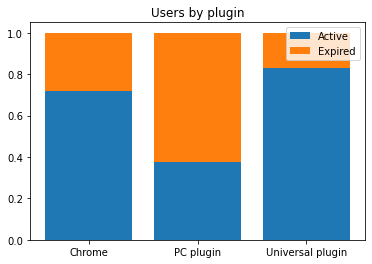

In [6]:
#Plotting to show relative usage of plugins
fig, ax = plt.subplots() 
ax.bar(plugins.index, plugins['Active'], label='Active')
ax.bar(plugins.index, plugins['Expired'], bottom=plugins['Active'], label='Expired')
ax.set_title('Users by plugin')
ax.legend()

The most active license type is a universal plugin, at 82% active usage, while PC plugins are the least active license type, at 37% active usage. I assume that the PC plugin provides functionality for Edword services on local software such as Microsoft Word, while the Chrome extension provides can be used for online services such as Word Online or Google Docs, or the Edword webpage. I also assume that the universal plugin provides functionality across both platforms. Thus, with the current increased usage of online document services and word processors such as Google Docs where Edword can be used, and where documents can be shared between users' computers as opposed to being localised, that both Chrome and Universal plugins are more popular, hence their active status is more often maintained. Consequentially, the PC plugin which is assumed to be for localised use e.g. on a school computer or a personal laptop, without sharing abilities, that the active usage is not maintained as often due to lack of use.

## Task 2
This task is more about finding your way through our data. In the “teacher_edword_data.zip” you will find two files which come from one of our APIs. These reflect the use by the teacher and their students in the platform. Recently the teacher has gotten curious about some things in their classroom and has sent an email asking if we could:

#### a.	Find out which are the 5 students that have received the most comments (of all types).

In [7]:
import pandas as pd

# Import csv data, parsing with appropriate delimiter
edword_data1 = pd.read_csv('C://Users//mbeye//Downloads//teacher_edword-1.csv', delimiter=';', header="infer") 

#Counting unique student IDs and sorting by frequency
students = edword_data1['StudentID'].value_counts().to_frame()
students.head(n=5)

,StudentID
5bfc14e27b14b352847d143b,96
5bb6105901569f7240b63ba6,86
5bb60f7d01569f7240b63ba3,86
5bb649a701569f7240b63c31,86
5bfc06367b14b352847d0c76,85


Thus, the five students above have recieved the most comments.

#### b.	Find out what is the average time it takes for :
  ##### i.	The teacher to send back feedback to all students for a given assignment.

The first issue we need to acknowledge is appropriately cleaning the data and formatting the timedata present, which is in multiple formats.

In [8]:
date_info = ['AssignmentStateTurnInDate', 'AssignmentStateFeedbackReleaseDate', 'AssignmentStateFeedbackViewStart']

#Remove all assignment info with no submission information, as no feedback will be given
edword_data1 = edword_data1.dropna(subset=date_info) 

#Fixing the date by converting string datetime to Python date format, 
#two formats are used thus two 'to_datetime' functions are needed
for i in date_info:
    edword_data1[i] = pd.to_datetime(edword_data1[i], format="%m/%d/%Y %H.%M", errors="coerce").fillna(pd.to_datetime(edword_data1[i], format="%m/%d/%y %I:%M:%S %p", errors="coerce"))

In [9]:
#Define time after assignment submission where feedback is released
edword_data1['FeedbackTime'] = edword_data1['AssignmentStateFeedbackReleaseDate']  - edword_data1['AssignmentStateTurnInDate'] 

#Grouping together by assignment to calculate mean time for feedback release
feedback_per_assignment = edword_data1.groupby(['AssignmentID'])['FeedbackTime'].mean().reset_index()
feedback_per_assignment = feedback_per_assignment.sort_values(by=['FeedbackTime'], ascending=True)
feedback_per_assignment

,AssignmentID,FeedbackTime
255,61af2ae0201e7c63cede182a,0 days 06:16:10.909090909
239,6184e331d56f75063f16960f,0 days 09:20:40
244,6194084ad56f75063f2081df,0 days 12:28:54
12,5bfb9b347b14b352847cc4af,0 days 13:53:57
114,5e7072790c04ad27816ed43f,0 days 14:59:12.529411764
...,...,...
181,5fb27053fa35b84f2e7be6b1,36 days 08:57:07.294117647
249,61a5d6d836a70b69b41ae519,40 days 10:28:37.500000
250,61a71bfe201e7c63cedb1f59,42 days 03:03:08.571428571
193,60127d04b914873c9e31a914,43 days 07:06:23.888888889


#### ii.	All students to open the feedback for a given assignment once it's been released.

Similar problem to above, however using mean of opening time for all students grouped by assignment.

In [10]:
#Define time after assignment submission where feedback is released
edword_data1['OpenTime'] = edword_data1['AssignmentStateFeedbackViewStart']  - edword_data1['AssignmentStateFeedbackReleaseDate'] 

#Grouping together by assignment to calculate mean time for feedback release
feedback_per_assignment = edword_data1.groupby(['AssignmentID'])['OpenTime'].mean().reset_index()
feedback_per_assignment = feedback_per_assignment.sort_values(by=['OpenTime'], ascending=True)
feedback_per_assignment

,AssignmentID,OpenTime
207,6089b4d8eaf3af0b0fadc1b4,0 days 00:13:46
257,61b990da201e7c63cee1a054,0 days 00:15:45
245,6194cd94d56f75063f20e6d4,0 days 00:32:36
250,61a71bfe201e7c63cedb1f59,0 days 02:20:25.714285714
249,61a5d6d836a70b69b41ae519,0 days 03:20:00
...,...,...
57,5cd93b3744ffb34cf0343d6e,170 days 14:24:08.363636364
58,5cee21437e2b0f2584a457d3,173 days 20:58:04.555555556
12,5bfb9b347b14b352847cc4af,216 days 01:00:53.666666668
6,5bf2d2a27b14b352847ba48b,250 days 03:57:27.750000


#### iii. Which is the assignment that has the least amount of FeedBackView data?

In [82]:
df1 = edword_data1.groupby(['AssignmentID']).size().to_frame() #All submissions
df2 = edword_data1[edword_data1['AssignmentStateCommentCount']!=0].groupby(['AssignmentID']).size().to_frame() #Feedback given

feedback_data = pd.merge(df1, df2, left_index=True, right_index=True)
feedback_data['Feedback Rate'] = feedback_data['0_y'] / feedback_data['0_x'] 
feedback_data = feedback_data.sort_values(by='Feedback Rate')
feedback_data

,0_x,0_y,Feedback Rate
AssignmentID,,,
5c8a07277962d9d39c2fda2c,2,1,0.500000
6183c7b6d56f75063f15d8e0,8,4,0.500000
5fd9cccb550c8704b3784c3c,17,9,0.529412
5ed9d3e331f1d7243f3ccb01,17,10,0.588235
619b69a8d56f75063f23de4d,15,9,0.600000
...,...,...,...
5c6f9844a63c5551d018bb65,19,19,1.000000
5c739c5ca63c5551d0191cb5,29,29,1.000000
5c7f8cc468fc8e90e02a7587,27,27,1.000000


Therefore, the assignment with the least amount of FeedbackViewData is AssignmentID 5c8a07277962d9d39c2fda2c.

#### c.	What is the maximum, median and average feedback study time by student? (Hint: the column you are looking for is `ActualStudyTime`). Please visualise this information as well.

In [58]:
# Import csv data, parsing with appropriate delimiter
edword_data2_raw = pd.read_csv('C://Users//mbeye//Downloads//teacher_edword-2.csv', delimiter=';', header="infer") 

edword_data2 = edword_data2_raw[edword_data2_raw['AssignmentStateProgress'] != '0']

maximum = edword_data2.groupby(['StudentID']).max(['ActualStudyTime'])['ActualStudyTime']
median = edword_data2.groupby(['StudentID']).median(['ActualStudyTime'])['ActualStudyTime']
mean = edword_data2.groupby(['StudentID']).mean(['ActualStudyTime'])['ActualStudyTime']
count = edword_data2.groupby(['StudentID']).size()

Text(0, 0.5, 'Number of comments made (each student)')

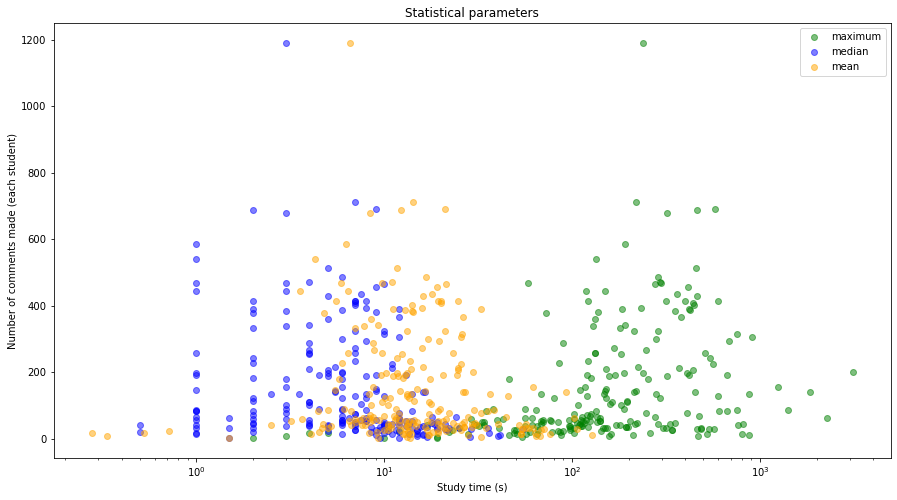

In [62]:
fig, ax = plt.subplots(figsize=(15,8))
ax.set_xscale('log')
ax.scatter(y=count, x=maximum, c='green', label='maximum', alpha=0.5)
ax.scatter(y=count, x=median, c='blue', label='median', alpha=0.5)
ax.scatter(y=count, x=mean, c='orange', label='mean', alpha=0.5)
ax.legend()
ax.set_title("Statistical parameters")
ax.set_xlabel("Study time (s)")
ax.set_ylabel("Number of comments made (each student)")

In this case, each student has 3 statistical parameters associated with their study time: Mean, Median, and Maximum. The graph above represents these three parameters graphed on the x-axis, with the number of comments made graphed on the y-axis.

Initially I had misinterpreted the question, and so created the below information, showing the length of study time across all students. I have kept it in for posterity.

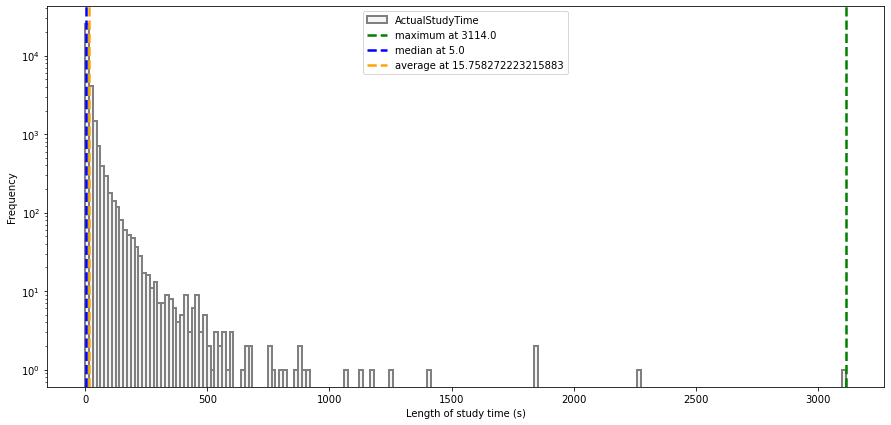

In [13]:
actual_study_time.plot(kind='hist', 
                       figsize=(15, 7), 
                       linewidth=2, 
                       color='whitesmoke', 
                       edgecolor='gray', 
                       bins=200, logy=True)

plt.xlabel('Length of study time (s)')
plt.ylabel('Frequency')

measurements = [actual_study_time.max(), actual_study_time.median(), actual_study_time.mean()]
names = ["maximum", "median", "average"]
colors = ['green', 'blue', 'orange']
for measurement, name, color in zip(measurements, names, colors):
    plt.axvline(x=measurement, linestyle='--', linewidth=2.5, label='{0} at {1}'.format(name, measurement), c=colors)
plt.legend();

## Task 3
The final task is related to the file “plugin_data.json” which is arguably the least tidy data we have. 

#### a.	Explain how you loaded the file into whatever environment you work with. Did you have any difficulties and if so how did you solve them?

In [14]:
data = pd.read_json("C://Users//mbeye//Downloads//plugin_data.json")
data.head(n=2)

,_id,_t,Date,EventType,UserID,SchoolID,Platform,Package,Data
0,6076ab6a8108a6432036226f,EventComment,2021-04-14 08:44:23.659000+00:00,14,5daed34c5e1652170c343d04,5daed1005c49928e006e7487,2,e26e3c4f-e448-48a2-8fcb-d39ab0f850f3,"{'ID': '601d142438bb1a65e5d69ae2', 'CommentTyp..."
1,6076ab718108a64320362270,EventComment,2021-04-14 08:44:30.630000+00:00,14,5daed34c5e1652170c343d04,5daed1005c49928e006e7487,2,97647e59-f28d-47f9-9a0e-b4245abf955d,"{'ID': '5dc0d351b7ad510b2c90c285', 'CommentTyp..."


There were not any issues with loading the .JSON file as a Pandas dataframe.

#### b.	We want to know some information about the different types of comments. Can you visualise a comparison between Library, Audio and Custom comments? (Hint: The documentation will help you understand which “EventType” you should isolate for)

By the Event type lookup table, all events are instances of a `CommentInsert`, presumedly the insertion of a comment in any format. We will need to identify the occur

#### c.	More of a theoretical question. Suppose you have full access to the database and you know where everything is. Naturally, the CommentID connects to another table where it serves as a key to find the content of the comment. The teachers and us are curious to know whether a comment’s length influences how much it is used. How would you approach this question? (Please note that no code is needed for this question, simply answer what you would do)

I would suggest such an approach:
- Use the plugin_data.json file to look up each comment in the database, using the relevant `CommentID`.
- Assuming that comments are both standardised suggestions or custom-fielded comments that are input by the teacher, each comment is parsed to count its length in words. These wordlength counts are then recorded.
- A frequency histogram of the wordlength counts is represented to show the occurrence rate of shorter vs longer comments.

There is an inherent bias to this method however, as certain types or groups of errors may occur naturally more often than others (e.g. spelling errors vs. grammatical errors), and if such 'popular' errors use a shorter comment length, will skew the representation of the influence between comment length and frequency.